No saved progress found. Starting from the beginning.
Classifying ID: 06425


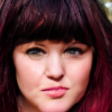

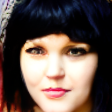

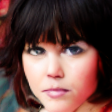

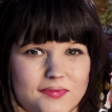

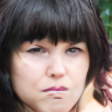

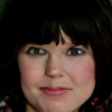

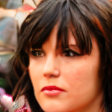

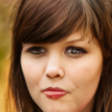

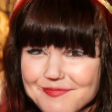

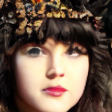

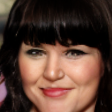

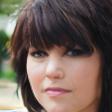

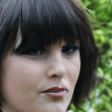

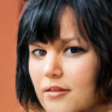

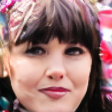

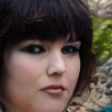

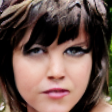

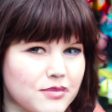

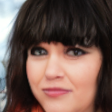

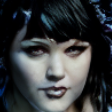

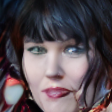

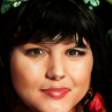

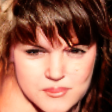

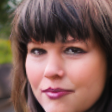

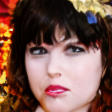

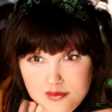

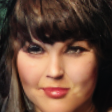

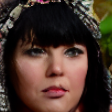

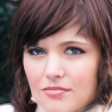

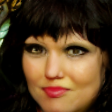

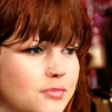

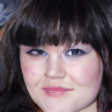

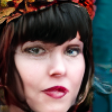

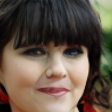

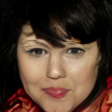

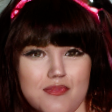

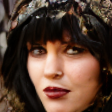

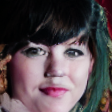

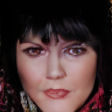

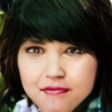

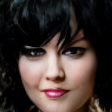

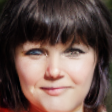

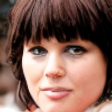

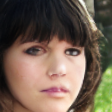

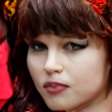

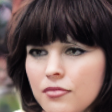

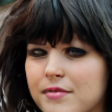

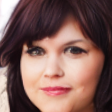

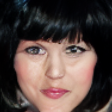

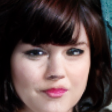

1: Caucasian_Male
2: Caucasian_Female
3: Indian_Male
4: Indian_Female
5: Asian_Male
6: Asian_Female
7: African_Male
8: African_Female
Classified IDs: 1
Caucasian_Male(0): []
Caucasian_Female(0): []
Indian_Male(0): []
Indian_Female(0): []
Asian_Male(0): []
Asian_Female(1): ['06425']
African_Male(0): []
African_Female(0): []
Classifying ID: 01610


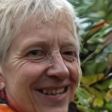

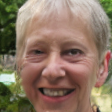

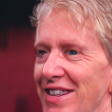

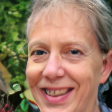

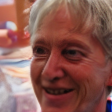

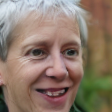

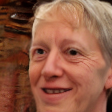

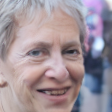

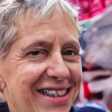

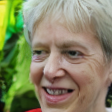

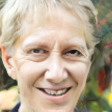

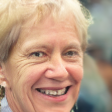

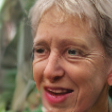

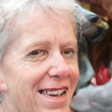

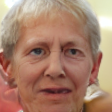

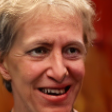

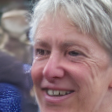

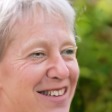

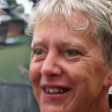

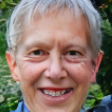

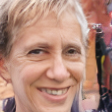

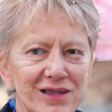

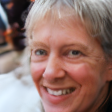

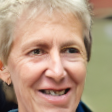

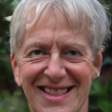

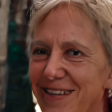

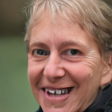

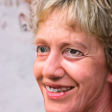

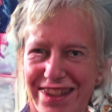

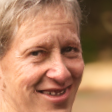

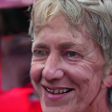

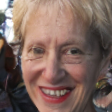

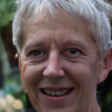

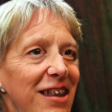

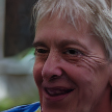

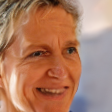

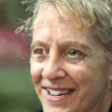

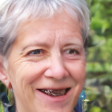

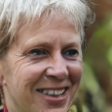

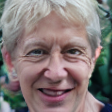

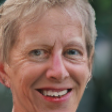

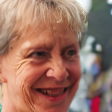

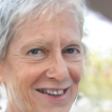

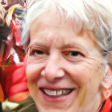

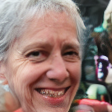

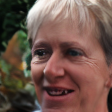

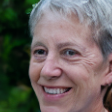

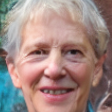

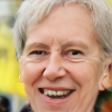

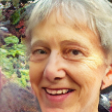

1: Caucasian_Male
2: Caucasian_Female
3: Indian_Male
4: Indian_Female
5: Asian_Male
6: Asian_Female
7: African_Male
8: African_Female
Classified IDs: 2
Caucasian_Male(1): ['01610']
Caucasian_Female(0): []
Indian_Male(0): []
Indian_Female(0): []
Asian_Male(0): []
Asian_Female(1): ['06425']
African_Male(0): []
African_Female(0): []
Classifying ID: 07670


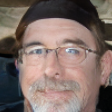

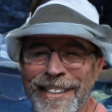

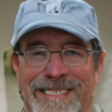

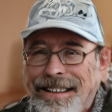

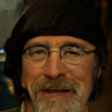

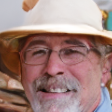

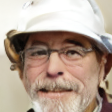

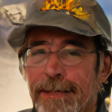

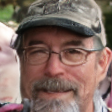

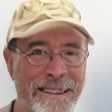

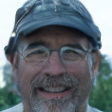

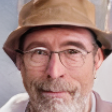

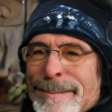

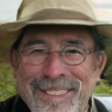

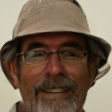

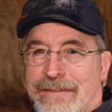

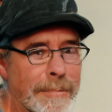

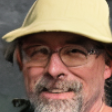

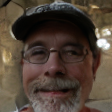

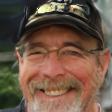

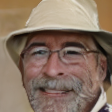

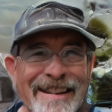

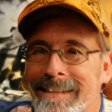

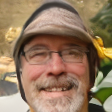

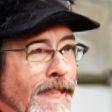

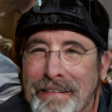

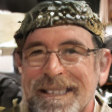

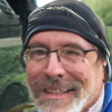

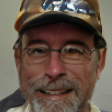

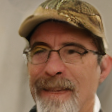

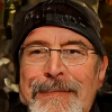

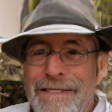

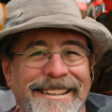

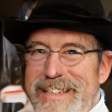

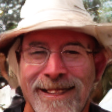

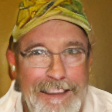

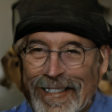

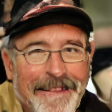

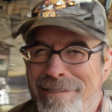

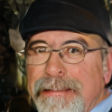

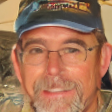

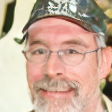

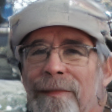

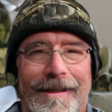

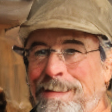

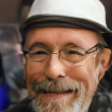

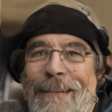

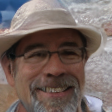

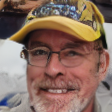

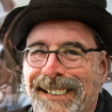

1: Caucasian_Male
2: Caucasian_Female
3: Indian_Male
4: Indian_Female
5: Asian_Male
6: Asian_Female
7: African_Male
8: African_Female
You chose to exit and save progress. Progress saved. Exiting.


In [4]:
# Python
import os
import random
import pickle
from IPython.display import display, Image

# Define the lists
lists = {
    'Caucasian_Male': [],
    'Caucasian_Female': [],
    'Indian_Male': [],
    'Indian_Female': [],
    'Asian_Male': [],
    'Asian_Female': [],
    'African_Male': [],
    'African_Female': [],
}

# Load the progress if it exists
try:
    with open('progress.pkl', 'rb') as f:
        lists, start_index = pickle.load(f)
    print('Loaded previous progress:')
    for name, list_ in lists.items():
        print(f'{name}({len(list_)}): {list_}')
except FileNotFoundError:
    print('No saved progress found. Starting from the beginning.')
    start_index = 0

# Define the directory
dir_path = '/workspace/two-stage'

# Get the subdirectories
subdirs = [os.path.join(dir_path, d) for d in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, d))]

# Initialize the count of classified IDs
classified_count = start_index

# Define an exception for exiting the program
class ExitProgram(Exception):
    pass

# Loop through the subdirectories
try:
    for subdir in subdirs[start_index:]:
        # Get the image files in the subdirectory
        image_files = [os.path.join(subdir, f) for f in os.listdir(subdir) if f.endswith('.png')]

        while True:
            # Print the current ID
            print(f'Classifying ID: {os.path.basename(subdir)}')

            # Display all the image files
            for image_file in image_files:
                display(Image(filename=image_file))

            # Ask the user to select the appropriate list
            list_names = list(lists.keys())
            for i, name in enumerate(list_names, 1):
                print(f'{i}: {name}')
            user_input = input('Enter the number of the appropriate list (1-8), "c" to select new images, "s" to skip this ID, or "e" to exit and save progress: ')

            if user_input.lower() == 'c':
                print('You chose to select new images.')
                continue
            elif user_input.lower() == 's':
                print('You chose to skip this ID.')
                break
            elif user_input.lower() == 'e':
                # Save the progress and exit
                with open('progress.pkl', 'wb') as f:
                    pickle.dump((lists, classified_count), f)
                print('You chose to exit and save progress. Progress saved. Exiting.')
                raise ExitProgram  # Raise the exception to exit the program
            elif user_input.isdigit() and 1 <= int(user_input) <= 8:
                list_index = int(user_input) - 1

                # Add the ID to the selected list
                lists[list_names[list_index]].append(os.path.basename(subdir))

                # Increment the count of classified IDs
                classified_count += 1

                # Print the count of classified IDs and the lists
                print(f'Classified IDs: {classified_count}')
                for name, list_ in lists.items():
                    print(f'{name}({len(list_)}): {list_}')
                
                break
            else:
                print(f'Invalid input: {user_input}. Please try again.')
except ExitProgram:
    pass  # Do nothing and let the program end